<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/10_1_2_THEORY_ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC Curve

This Python notebook demonstrates the process of evaluating a multi-class classification model using the ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve) metrics. These tools provide a visual and numerical assessment of the model's ability to distinguish between classes based on the tradeoff between true positive rates (sensitivity) and false positive rates.


## Data Preparation:

The Iris dataset is used, and the target variable is binarized to represent a multi-class scenario.

Data is split into training and testing sets.

## Model Training:

A K-Nearest Neighbors (KNN) classifier is trained to predict class probabilities and generate predictions.

## ROC and AUC:

- The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various thresholds, showing the model's performance across different decision boundaries.

- The AUC represents the area under the ROC curve, providing a single scalar value to summarize model performance; higher values indicate better discrimination ability.

## Visualization:

ROC curves are generated for each class, illustrating the classifier's performance in distinguishing between the target categories.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

We binarize `y_test`

In [ ]:
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_class = y_test.shape[1]
print(y_test[:3])

[[0 1 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
print(y_score[:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
classifier.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
classifier.predict_proba(X_test)

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

Remember:

* `.predict()` will output a 0 or a 1.
* `.predict_proba()` will output a probability estimate.

## Compute ROC curve and ROC-AUC for each class

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

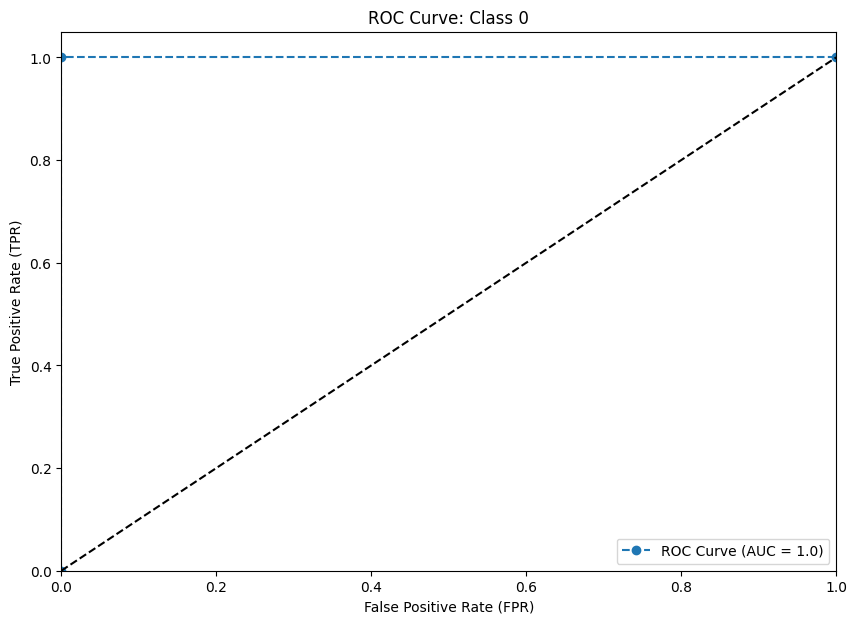

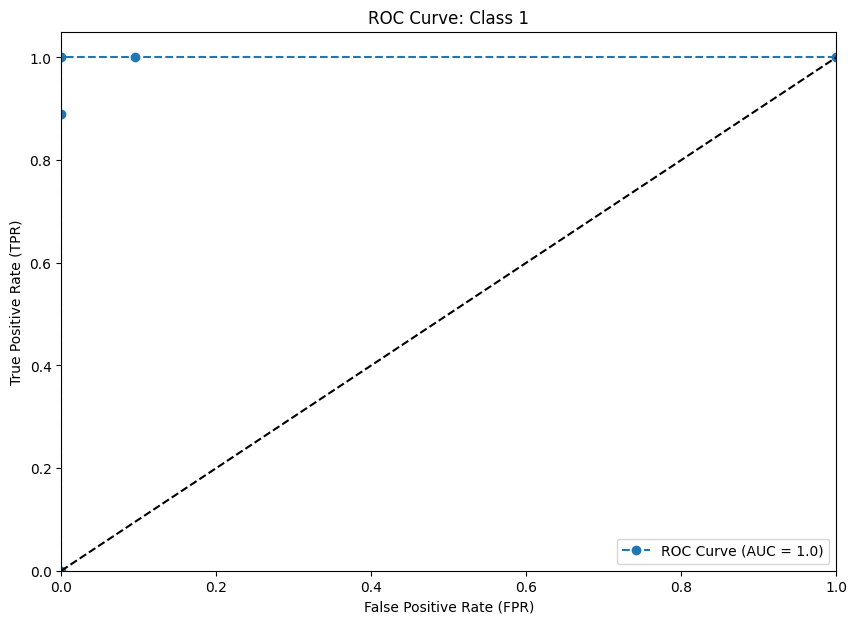

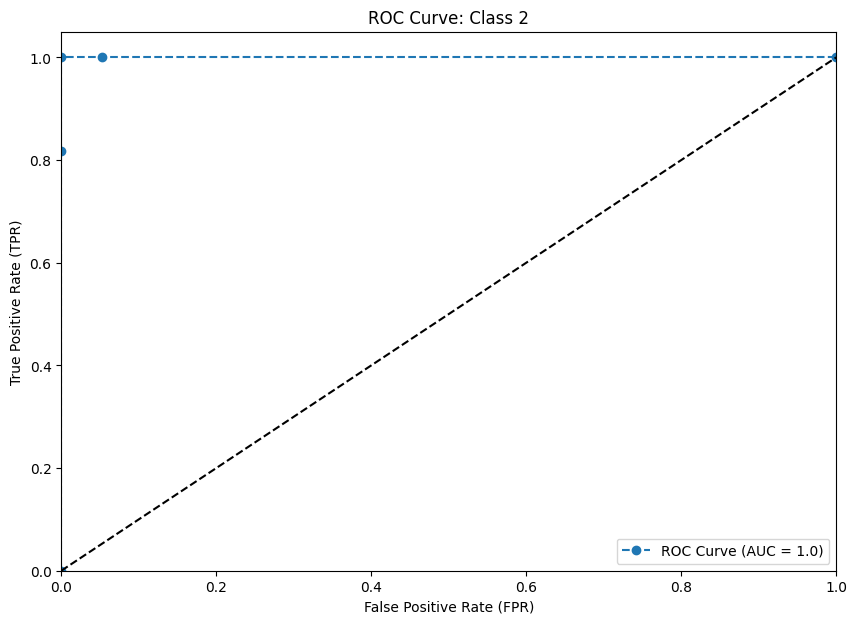

In [ ]:
for i in range(n_class):
    plt.figure(figsize=(10, 7))
    plt.plot(fpr[i], tpr[i],'o--', label=f"ROC Curve (AUC = {roc_auc[i]})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f"ROC Curve: Class {i}")
    plt.legend(loc="lower right")
    plt.show()